## 14.1 主成分分析

### 14.1.1 方差、协方差和协方差矩阵

代码 14.1

In [1]:
import numpy as np

X = np.array([
    [2, 0, -1.4],
    [2.2, 0.2, -1.5],
    [2.4, 0.1, -1],
    [1.9, 0, -1.2]
])
print(np.cov(X).T)

[[2.92       3.16       2.95       2.67      ]
 [3.16       3.43       3.175      2.885     ]
 [2.95       3.175      3.01       2.705     ]
 [2.67       2.885      2.705      2.44333333]]


### 14.1.2 特征向量和特征值

代码 14.2

In [2]:
import numpy as np

w, v = np.linalg.eig(np.array([[1, -2], [2, -3]]))
print(w)
print(v)

[-0.99999998 -1.00000002]
[[0.70710678 0.70710678]
 [0.70710678 0.70710678]]


### 14.1.3 进行主成分分析

## 14.2 使用 PCA 对高维数据可视化

代码 14.3

In [3]:
# https://archive.ics.uci.edu/dataset/53/iris

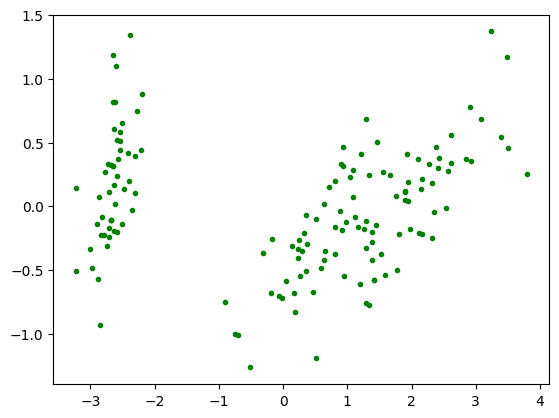

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# 读取iris.data文件
data = pd.read_csv('./iris.data', header=None)

# 提取特征矩阵（前四列）
X = data.iloc[:, :-1].values

# 提取目标向量（最后一列）
y = data.iloc[:, -1].values
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

## 14.3 使用 PCA 进行面部识别

代码 14.4

In [5]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from PIL import Image

X = []
y = []
for dirpath, _, filenames in os.walk('./orl_faces'):
    for filename in filenames:
        if filename[-3:] == 'pgm':
            img = Image.open(os.path.join(dirpath, filename)).convert('L')
            arr = np.array(img).reshape(10304).astype('float32') / 255.
            X.append(arr)
            y.append(dirpath)
X = scale(X)


代码 14.5

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
pca = PCA(n_components=150)

代码 14.6

In [7]:
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
print(X_train.shape)
print(X_train_reduced.shape)
classifier = LogisticRegression(max_iter=1000)
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
accuracies = cross_val_score(classifier, X_train_reduced, y_train, cv=skf)
print('Cross validation accuracy: %s' % np.mean(accuracies))
classifier.fit(X_train_reduced, y_train)
predictions = classifier.predict(X_test_reduced)
print(classification_report(y_test, predictions,zero_division=1))

(300, 10304)
(300, 150)
Cross validation accuracy: 0.9566666666666667
                 precision    recall  f1-score   support

 ./orl_faces\s1       1.00      1.00      1.00         1
./orl_faces\s10       1.00      1.00      1.00         5
./orl_faces\s11       1.00      1.00      1.00         3
./orl_faces\s12       1.00      1.00      1.00         2
./orl_faces\s13       1.00      1.00      1.00         2
./orl_faces\s14       1.00      1.00      1.00         2
./orl_faces\s15       1.00      1.00      1.00         2
./orl_faces\s16       1.00      1.00      1.00         4
./orl_faces\s17       1.00      1.00      1.00         2
./orl_faces\s18       1.00      1.00      1.00         1
./orl_faces\s19       1.00      1.00      1.00         2
 ./orl_faces\s2       1.00      1.00      1.00         4
./orl_faces\s20       1.00      1.00      1.00         3
./orl_faces\s21       1.00      1.00      1.00         3
./orl_faces\s22       1.00      1.00      1.00         2
./orl_faces\s23  